# Task 2 - Implementation and application of dotplot

### 1. Problem

A dotplot is an image of black and white pixels of size n x m. We place a sequence of length n and sequence of length m
along each axis. For each element that it does match, we place a black pixel. Because we have lots of dots we use a window
of size w around pixel p, and we color that pixel only if the number of matches is greater than stringency s.

Dotplot is an image from which we can see the similarity of two sequences. Usually, similar subsequences will have a long
line in dotplot. Using dotplots we can find highly similar repeating subsequences. However, sequences should not be too long since it is hard to interpret the results on big images.


In [1]:
import gzip
from collections import Counter
from matplotlib.pylab import plt
import numpy as np
import imageio

def loadFasta(filename, verbose=0):
    """
    Parses a classically formatted and possibly
    compressed FASTA file into a dictionary where the key
    for a sequence is the first part of its header without
    any white space; if verbose is nonzero then the identifiers
    together with lengths of the read sequences are printed
    """
    if filename.endswith(".gz"):
        fp = gzip.open(filename, 'rt')
    else:
        fp = open(filename, 'r')
    # split at headers
    # data = fp.read().split('>')
    data = fp.read()
    data = data.split('>')
    fp.close()
    # ignore whatever appears before the 1st header
    data.pop(0)
    # prepare the dictionary
    D = {}
    for sequence in data:
        lines = sequence.split('\n')
        header = lines.pop(0).split()
        key = header[0]
        D[key] = ''.join(lines)
        if verbose:
            print("Sequence %s of length %d read" % (key, len(D[key])))
    return D

In [2]:
def get_square(s1, s2, i, j, w):
    """
    :param M: dot matrix of w size 1
    :param i: x pixel coordinate
    :param j: y pixel coordinate
    :param w: half of window size w
    :return: sum of pairwise same elements in sequences s1 and s2
    """
    return sum(1 if x == y else 0 for x, y in zip(s1[i - w:i + w + 1], s2[j - w:j + w + 1]))

In [3]:
def dot_matrix(s1, s2, window, s):
    """
    :param s1: first sequence
    :param s2: second sequence
    :param window: window size not including pixel on which we put the window
    :param s: stringency
    :return: dotplot array
    """
    if window % 2:
        # we should have even size so left and right side of window from pixel is the same
        print("WARNING: window size should be even") 
    spacing = int(window / 2)
    w = len(s1)
    h = len(s2)
    
    M_new = np.array([[get_square(s1, s2, i, j, spacing) > s for j in range(spacing, w - spacing + 1)] for i in
                      range(spacing, h - spacing + 1)])
    M_new = M_new *255
    return M_new.astype(np.uint8)

In [4]:
def plot_dot_plot(s1, s2, w, s, name='result.jpg'):
    """
    :param s1: first sequence
    :param s2: second sequence
    :param w: window size -1
    :param s: stringency
    :param name: output image name
    :return: dotplot image
    """
    M = dot_matrix(s1, s2, w, s)
    # we save the image
    imageio.imwrite(name, M)
    dotplot = plt.imshow(M, cmap='gray')
    # remove if we use short sequences - we display elements on axis
    # xt = plt.xticks(np.arange(len(list(s1))), list(s1)) 
    # yt = plt.yticks(np.arange(len(list(s2))), list(s2))
    plt.show()

### 3. Problem
The following task is from the book "Bioinformatik Interaktiv" (Merkl und Waack). Using your program compare the following sequence with itself:

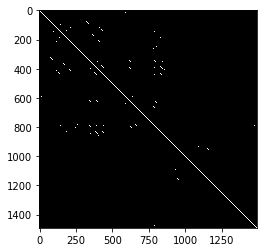

In [5]:
s1 = "MAAPSRTTLMPPPFRLQLRLLILPILLLLRHDAVHAEPYSGGFGSSAVSSGGLGSVGIHIPGGGVGVITE ARCPRVCSCTGLNVDCSHRGLTSVPRKISADVERLELQGNNLTVIYETDFQRLTKLRMLQLTDNQIHTIE RNSFQDLVSLERLRLNNNRLKAIPENFVTSSASLLRLDISNNVITTVGRRVFKGAQSLRSLQLDNNQITC LDEHAFKGLVELEILTLNNNNLTSLPHNIFGGLGRLRALRLSDNPFACDCHLSWLSRFLRSATRLAPYTR CQSPSQLKGQNVADLHDQEFKCSGLTEHAPMECGAENSCPHPCRCADGIVDCREKSLTSVPVTLPDDTTE LRLEQNFITELPPKSFSSFRRLRRIDLSNNNISRIAHDALSGLKQLTTLVLYGNKIKDLPSGVFKGLGSL QLLLLNANEISCIRKDAFRDLHSLSLLSLYDNNIQSLANGTFDAMKSIKTVHLAKNPFICDCNLRWLADY LHKNPIETSGARCESPKRMHRRRIESLREEKFKCSWDELRMKLSGECRMDSDCPAMCHCEGTTVDCTGRG LKEIPRDIPLHTTELLLNDNELGRISSDGLFGRLPHLVKLELKRNQLTGIEPNAFEGASHIQELQLGENK IKEISNKMFLGLHQLKTLNLYDNQISCVMPGSFEHLNSLTSLNLASNPFNCNCHLAWFAEWLRKKSLNGG AARCGAPSKVRDVQIKDLPHSEFKCSSENSEGCLGDGYCPPSCTCTGTVVRCSRNQLKEIPRGIPAETSE LYLESNEIEQIHYERIRHLRSLTRLDLSNNQITILSNYTFANLTKLSTLIISYNKLQCLQRHALSGLNNL RVLSLHGNRISMLPEGSFEDLKSLTHIALGSNPLYCDCGLKWFSDWIKLDYVEPGIARCAEPEQMKDKLI LSTPSSSFVCRGRVRNDILAKCNACFEQPCQNQAQCVALPQREYQCLCQPGYHGKHCEFMIDACYGNPCR NNATCTVLEEGRFSCQCAPGYTGARCETNIDDCLGEIKCQNNATCIDGVESYKCECQPGFSGEFCDTKIQ FCSPEFNPCANGAKCMDHFTHYSCDCQAGFHGTNCTDNIDDCQNHMCQNGGTCVDGINDYQCRCPDDYTG KYCEGHNMISMMYPQTSPCQNHECKHGVCFQPNAQGSDYLCRCHPGYTGKWCEYLTSISFVHNNSFVELE PLRTRPEANVTIVFSSAEQNGILMYDGQDAHLAVELFNGRIRVSYDVGNHPVSTMYSFEMVADGKYHAVE LLAIKKNFTLRVDRGLARSIINEGSNDYLKLTTPMFLGGLPVDPAQQAYKNWQIRNLTSFKGCMKEVWIN HKLVDFGNAQRQQKITPGCALLEGEQQEEEDDEQDFMDETPHIKEEPVDPCLENKCRRGSRCVPNSNARD GYQCKCKHGQRGRYCDQGEGSTEPPTVTAASTCRKEQVREYYTENDCRSRQPLKYAKCVGGCGNQCCAAK IVRRRKVRMVCSNNRKYIKNLDIVRKCGCTKKCY"
table = str.maketrans({' ': ''})
s1 = s1.translate(table)
plot_dot_plot(s1, s1, 14, 5, name='result1.jpg')

![result1](result1.jpg "Dotplot from 3rd problem.")

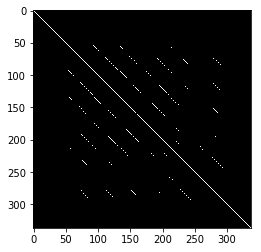

CDCGLKWFSDWIKLDYVEPGIARCAEPEQMKDKLILSTPSSSFVCRGRVRNDILAKCNACFEQPCQNQAQCVALPQREYQCLCQPGYHGKHCEFMIDACYGNPCRNNATCTVLEEGRFSCQCAPGYTGARCETNIDDCLGEIKCQNNATCIDGVESYKCECQPGFSGEFCDTKIQFCSPEFNPCANGAKCMDHFTHYSCDCQAGFHGTNCTDNIDDCQNHMCQNGGTCVDGINDYQCRCPDDYTGKYCEGHNMISMMYPQTSPCQNHECKHGVCFQPNAQGSDYLCRCHPGYTGKWCEYLTSISFVHNNSFVELEPLRTRPEANVTIVFSSAEQNGILMYDGQDAHLAVE


In [6]:
# restricting sequence to relative parts
plot_dot_plot(s1[875:1225], s1[875:1225], 14, 5, name='result2.jpg')
print(s1[875:1225])

![result2](result2.jpg "Restricted dotplot")


Parallel lines indicate tandem repeats of a larger motif in both sequences, so called minisatellite patterns.
I used [RADAR](https://www.ebi.ac.uk/Tools/pfa/radar/) to identify gapped approximate repeats and complex repeat architectures.
Results can be seen in the image bellow.
![alt text](radar.png "")

### 4. Problem
Sequence belongs to Homo sapiens - human

In [ ]:
D = loadFasta('NM_000044.fasta')
hs_seq = D[list(D.keys())[0]]

i = 10
plot_dot_plot(hs_seq, hs_seq, 25 - 1, i, name='homo_sapiens' + str(i) + '.jpg')

Bold blocks on the main diagonal indicate repetition of the same symbol in both sequences, so called microsatellite repeats. We can notice two blocks on an image bellow marked with red frames. 
![homo sapiens](homo_sapiens10_marked.jpg "Dotplot of Homo sapiens androgen receptor")

In [13]:
print("First block:")
print(hs_seq[100:150])
print("Second block:")
print(hs_seq[3680:3850])

First block:
GGTCTTCAGTAGCCAAAAAACAAAACAAACAAAAACAAAAAAGCCGAAAT
Second block:
GAGCTAAGATTATCTGGGGAAATCAAAACAAAAACAAGCAAACAAAAAAAAAAAGCAAAAACAAAACAAAAAATAAGCCAAAAAACCTTGCTAGTGTTTTTTCCTCAAAAATAAATAAATAAATAAATAAATACGTACATACATACACACATACATACAAACATATAGAA


In first and second subsequence we notice a lot of repeats of adenine. We can also notice a lot of repeats of subsequence CAAAA.

### 5. Problem 
Globins are proteins, which bind and transport oxygen. Recently there was found one such protein in nine-banded armadillo (Dasypus novemcinctus) - see the picture below - using a similarity test.

![armadilo](armadilo.jpg "Armadillo")

In [14]:
s1 = 'MESPEPELIRQSWRVVSRSPLEHGTILFARLFDLEPDLLSLFQYNCRQFSSVEACLSSPEFLDHIRKVMVVIDTAVTNVEDLSSLEEYLAGLGRKHRAVGVKLSSFSEIQERQWDLLQVIRRKQPEKSRRVCRVKGGSSGRALQPDPRQHLDLGQVLLHQRREPRGAPSPPQYLGRTLSPGAPAVPPEQPSPLGHPLLPCAPR'
s2 = 'MERPEPELIRQSWRAVSRSPLEHGTVLFARLFALEPDLLPLFQYNCRQFSSPEDCLSSPEFLDHIRKVMLVIDAAVTNVEDLSSLEEYLASLGRKHRAVGVKLSSFSTVGESLLYMLEKCLGPAFTPATRAAWSQLYGAVVQAMSRGWDGE'

def sim_score(s1, s2):
    score = 0
    for x, y in zip(s1, s2):
        if x == y:
            score += 1
    return score
print('Similarity score of protein sequences (first 107 elements) is '+str(sim_score(s1[:107], s2[:107])))

Similarity score of protein sequences (first 107 elements) is 97


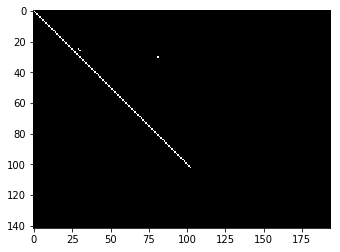

In [15]:
plot_dot_plot(s1, s2, 10, 5, name='globins.jpg')

Length of longest highly common subsequence is 107 and there are 97 matching amino acids.
![globins](globins.jpg "Comparing globins")

### 6. Problem 
HIV dotplot
![alt text](hiv.png "HIV dotplot") 

Parallels to the main diagonal indicate repeated regions in the same reading direction on different parts of the sequences. Repeated subsequences are displayed bellow.

In [16]:
D = loadFasta('hiv.fasta')
hiv_seq = D[list(D.keys())[0]]
print(hiv_seq[9:647])
print(hiv_seq[-643:-5])

TGGAAGGGCTAATTCACTCCCAACGAAGACAAGATATCCTTGATCTGTGGATCTACCACACACAAGGCTACTTCCCTGATTGGCAGAACTACACACCAGGACCAGGGATCAGATATCCACTGACCTTTGGATGGTGCTACAAGCTAGTACCAGTTGAGCCAGATAAGGTAGAAGAGGCCAACAAAGGAGAGAACACCAGCTTGTTACACCCTGTGAGCCTGCATGGAATGGATGACCCGGAGAGAGAAGTGTTAGAGTGGAGGTTTGACAGCCGCCTAGCATTTCATCACGTGGCCCGAGAGCTGCATCCGGAGTACTTCAAGAACTGCTGATATCGAGCTTGCTACAAGGGACTTTCCGCTGGGGACTTTCCAGGGAGGCGTGGCCTGGGCGGGACTGGGGAGTGGCGAGCCCTCAGATGCTGCATATAAGCAGCTGCTTTTTGCCTGTACTGGGTCTCTCTGGTTAGACCAGATCTGAGCCTGGGAGCTCTCTGGCTAACTAGGGAACCCACTGCTTAAGCCTCAATAAAGCTTGCCTTGAGTGCTTCAAGTAGTGTGTGCCCGTCTGTTGTGTGACTCTGGTAACTAGAGATCCCTCAGACCCTTTTAGTCAGTGTGGAAAATCTCTAGCAGTGG
TGGAAGGGCTAATTCACTCCCAACGAAGACAAGATATCCTTGATCTGTGGATCTACCACACACAAGGCTACTTCCCTGATTGGCAGAACTACACACCAGGACCAGGGATCAGATATCCACTGACCTTTGGATGGTGCTACAAGCTAGTACCAGTTGAGCCAGATAAGGTAGAAGAGGCCAACAAAGGAGAGAACACCAGCTTGTTACACCCTGTGAGCCTGCATGGAATGGATGACCCGGAGAGAGAAGTGTTAGAGTGGAGGTTTGACAGCCGCCTAGCATTTCATCACGTGGCCCGAGAGCTGCATCCGGAGTACTTCAAGAACTGCTGATATCGAGCTTGCTACAAGGGACTTTCCGC